<a href="https://colab.research.google.com/github/boxed-mikann/google_colab_ipynb/blob/main/BPEexercisesA2025_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **生物工学演習A後半　第2回**

このページは生物工学演習A後半の授業資料です。閲覧・共有は受講者限りとします。

<br>




## **１．チュートリアル**

### データの部分要素（スライス）を取得する

- 基本書式はarray[start:stop:step]
- 何も書かなければstart=最初、stop=最後、step=1とみなされる

In [ ]:
import numpy as np

A = np.linspace(0,10,11)

print(A) # A全体
print(A[2]) # 2番目の要素
print(A[2:]) # 2番目以降
print(A[2:8]) # 2〜8番目
print(A[2:8:2]) # 2〜8番目を2つ飛ばし
print(A[2::2]) # 2番目以降を2つ飛ばし
print(A[:5:-2]) # 末尾から5番目までを2つ飛ばし

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
2.0
[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
[2. 3. 4. 5. 6. 7.]
[2. 4. 6.]
[ 2.  4.  6.  8. 10.]
[10.  8.  6.]


### 形状変換(reshape)と転置(transpose)を行う1

In [ ]:
D = np.linspace(0,11,12) # 12要素のベクトルDを生成
print(D)
print('Shape:', D.shape)

D = np.reshape(D, (3,4)) # Dを(3,4)の2次元行列にreshape
print(D)
print('Shape:', D.shape)

D = np.transpose(D) # Dを転置
print(D)
print('Shape:', D.shape)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Shape: (12,)
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
Shape: (3, 4)
[[ 0.  4.  8.]
 [ 1.  5.  9.]
 [ 2.  6. 10.]
 [ 3.  7. 11.]]
Shape: (4, 3)


### 形状変換(reshape)と転置(transpose)を行う2

In [ ]:
D = np.reshape(D, (12,)) # もう一度12要素のベクトルに戻す（中身は最初と異なる）
print(D)
print('Shape:', D.shape)

D = np.reshape(D, (4,3))
print(D)
print('Shape:', D.shape)

D = np.transpose(D)
print(D)
print('Shape:', D.shape)

D = np.reshape(D, (12,))
print(D)
print('Shape:', D.shape)

[ 0.  4.  8.  1.  5.  9.  2.  6. 10.  3.  7. 11.]
Shape: (12,)
[[ 0.  4.  8.]
 [ 1.  5.  9.]
 [ 2.  6. 10.]
 [ 3.  7. 11.]]
Shape: (4, 3)
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
Shape: (3, 4)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Shape: (12,)


### 行列のスライスを行う

In [ ]:
M = np.linspace(0,15,16)
M = np.reshape(M, (4,4)) # [4x4]行列Mを作成

print(M) # M全体
print(M[2,:]) # Mのうちの1つめの次元について2番目の要素のみ取得
print(M[:,::2]) # Mのうちの2つめの次元について2つ飛ばしで取得

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]
[ 8.  9. 10. 11.]
[[ 0.  2.]
 [ 4.  6.]
 [ 8. 10.]
 [12. 14.]]



---

## **2. 演習課題**


**ここから演習課題です。以下の指示に従って課題に取り組み、解答を提出してください。**

- 上記のチュートリアルや課題中の記述、またオンライン資料・参考書などを参照しながら演習を進めてください。
- 解答にPythonを利用した場合、利用したコードとその結果を解答に含めてください。
- 1日分の演習に対する解答を1ファイルにまとめ、WordあるいはPDF形式でCLEから提出してください。
- 課題番号と解答の対応が判るように整理した解答を提出してください。
- pynb（課題番号、コード、結果、テキスト解答が整理・明示されているもの）をPDFに変換して提出しても構いません。（Macの場合は「ファイル」→「プリント」→「PDF」）
- 解答の提出は演習時間内を想定していますが、間に合わなければ所定の期限までに提出してください。
- なお「オプション」となっている項目は応用問題です。難しければ必ずしも解答する必要はありませんが、解答は加点対象になります。

<br>


---
### **課題1: MRI構造画像を扱う1（MPRとスライス）**

以下の解析用ファイルにはMRIによって得られたヒト頭部の3次元構造データ*（Multi Planar Reconstruction (MPR)、T1強調画像）が格納されています。被験者の個人情報保護のため、顔部分は削除(deface処理)されています。

<br>

解析用ファイル

https://nishimotolab.org/downloads/sub-CN021_T1w.nii.gz

*以下のオープンデータを利用（CC0）:
https://openneuro.org/datasets/ds003643/versions/2.0.1

3次元レンダリング例（顔部分はdeface処理）

<img src="https://nishimotolab.org/images/seeds/cn021_rendering.png" width=40%>

<br><br>

**データを読み込み、矢状面（しじょうめん）、冠状面、横断面（体軸面）の断層画像（スライス）をプロットしてください（合計3つの画像をプロット）。ただし、それぞれのスライスには小脳が大きく含まれるように、スライス位置を選択した上でプロットしてください。また、矢状面はプロット左が前（顔側）で上が上（頭頂）、冠状面はプロット上が上（頭頂）、横断面はプロット上が前（顔側）になるように表示してください。**

<br>

ヒント: 解答には以下のサンプルコードや記述等を参考にしても構いません。



```python
# 準備　ファイルをダウンロードする
!wget https://nishimotolab.org/downloads/sub-CN006_T1w.nii.gz
# 上記は一度実行すればColabサーバにファイルがダウンロードされます。1セッション内で2回以上実行する必要はありません。
```

```python
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib #脳イメージングデータ用ライブラリnibabelを呼び出し、nibと命名

# ダウンロードしたファイルを読み込み
nii0=nib.load('sub-CN006_T1w.nii.gz')
br=nii0.get_fdata()

# 読み込んだ3次元脳構造データ（x,y,z)のサイズを表示
print('Volume size:', br.shape)

# z軸方向について30枚目のスライスを選択
br_slice = br[:,:,30]

# プロット左が前（顔側）になるようにスライスを転置(transpose)
br_slice = np.transpose(br_slice, [1,0])

# プロットを表示
plt.figure(figsize=(10,10))
plt.imshow(br_slice, cmap='gray', vmax=800)
plt.show()
```

<br><br>



In [1]:
# 準備　ファイルをダウンロードする
!wget https://nishimotolab.org/downloads/sub-CN006_T1w.nii.gz
# 上記は一度実行すればColabサーバにファイルがダウンロードされます。1セッション内で2回以上実行する必要はありません。

--2025-10-23 05:57:53--  https://nishimotolab.org/downloads/sub-CN006_T1w.nii.gz
Resolving nishimotolab.org (nishimotolab.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nishimotolab.org (nishimotolab.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8400042 (8.0M) [application/gzip]
Saving to: ‘sub-CN006_T1w.nii.gz’

sub-CN006_T1w.nii.g 100%[===================>]   8.01M  --.-KB/s    in 0.09s   

2025-10-23 05:57:53 (88.4 MB/s) - ‘sub-CN006_T1w.nii.gz’ saved [8400042/8400042]



Volume size: (256, 256, 176)


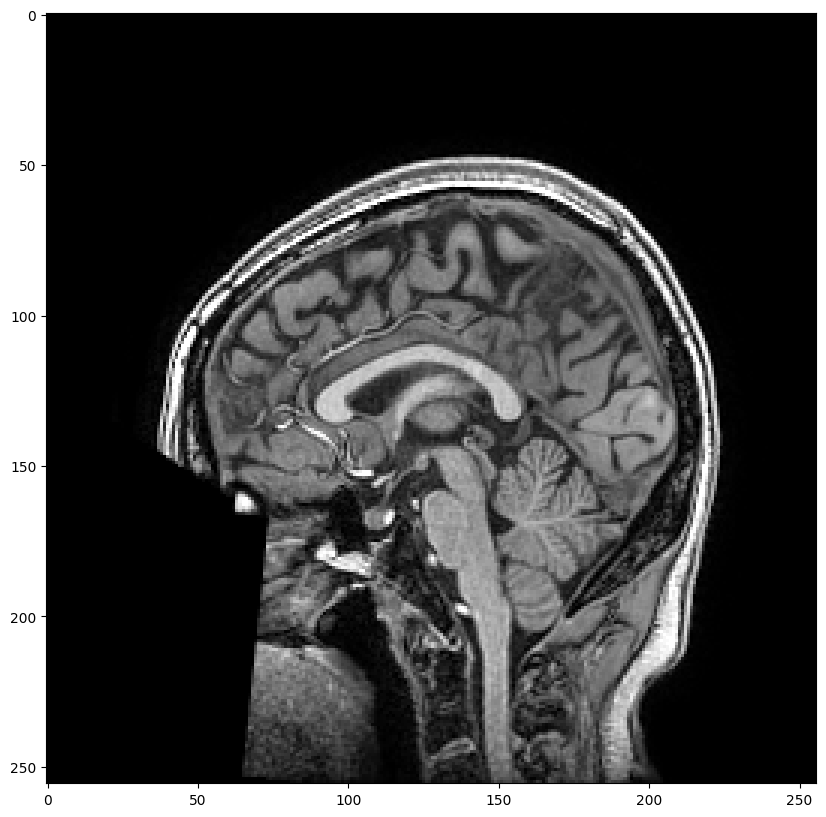

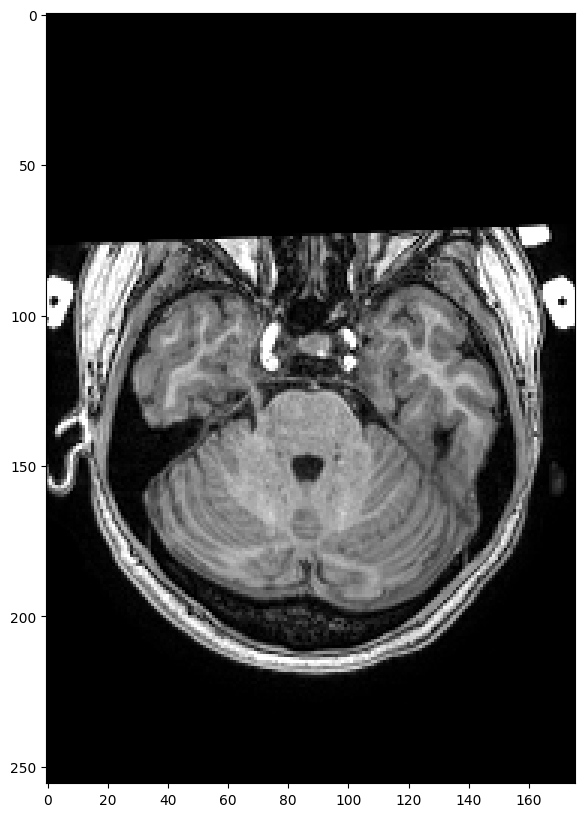

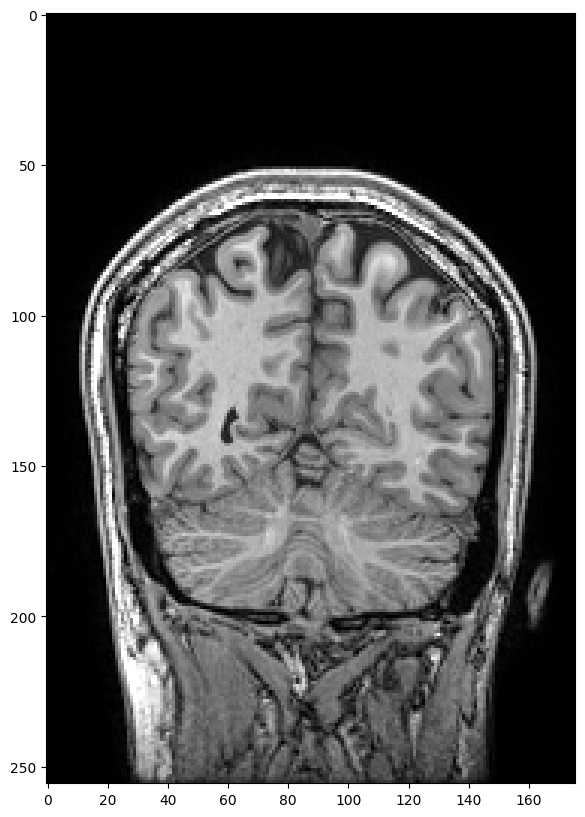

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib #脳イメージングデータ用ライブラリnibabelを呼び出し、nibと命名

# ダウンロードしたファイルを読み込み
nii0=nib.load('sub-CN006_T1w.nii.gz')
br=nii0.get_fdata()

# 読み込んだ3次元脳構造データ（x,y,z)のサイズを表示
print('Volume size:', br.shape)

# z軸方向について30枚目のスライスを選択
br_slice = br[:,:,88]

# プロット左が前（顔側）になるようにスライスを転置(transpose)
br_slice = np.transpose(br_slice, [1,0])

# プロットを表示
plt.figure(figsize=(10,10))
plt.imshow(br_slice, cmap='gray', vmax=800)
plt.show()

br_slice2 = br [:,170,:]
# プロットを表示
plt.figure(figsize=(10,10))
plt.imshow(br_slice2, cmap='gray', vmax=800)
plt.show()

br_slice3 = br [170,:,:]
# プロットを表示
plt.figure(figsize=(10,10))
plt.imshow(br_slice3, cmap='gray', vmax=800)
plt.show()


---
### **課題2: MRI構造画像を扱う2（多次元転置とreshape）**

1.  **矢状面、冠状面、横断面（体軸面）について、それぞれ3次元ボリュームの端から端まで等間隔に10枚のスライスを選択し、スライスを横に並べた2次元画像としてプロットしてください（合計3つの横に長い画像をプロット）。各スライスの前後左右の並び方（矢状面は左が前側等）は課題１と同様とします。**

2.  **（オプション）矢状面、冠状面、横断面（体軸面）それぞれについて、すべてのスライスをモザイク形式（スライスが2次元タイル状に配置される形式、下記オプション作図例参照）で表示してください。（ヒント：最終的な画像はXY軸がそれぞれボクセルとスライスの二重になっており、4次元の転置を含むreahape, transpose, reshapeの3行で変換可能）**

<br>

ヒント：　以下のサンプルコードを参考にしても構いません。



```python
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib #脳イメージングデータ用ライブラリnibabelを呼び出し、nibと命名

# ダウンロードしたファイルを読み込み
nii0=nib.load('sub-CN006_T1w.nii.gz')
br=nii0.get_fdata()

# 左右方向（Z軸）について等間隔に10枚のスライスを選択
# (x256*y256*z176) to (x256*y256*z10)
slices = np.linspace(0, br.shape[2]-1, 10, dtype=int)
print("Selected slices:", slices)
br_slices = br[:, :, slices]

# 最終的な2次元画像の縦軸が上下方向(y軸)、横軸が前後方向(x軸)*スライスとなるように、3次元配列を前もって転置
#  [0,1,2]  (x256*y256*z10) to [1,2,0] (y256*z10*x256)
br_slices = np.transpose(br_slices, [1,2,0])

# 2次元画像にするためにreshape
# (y256*z10*x256) to (y256*(x+z)2560)
br_slices = np.reshape(br_slices, (256, 10*256))

# プロットを表示
plt.figure(figsize=(12,12))
plt.imshow(br_slices, cmap='gray', vmax=800)
plt.show()
```

<br>

作図例：　たとえば冠状面について7スライスを等間隔に選んだ場合、（頭部前後の空気を含めて）以下のようなプロットになる想定です。

<img src="https://nishimotolab.org/images/seeds/coronal_7.png" width=100%>


<br>


オプション課題の作図例（冠状面、左上から右下にかけて前側から後側のスライスを表示）
<img src="https://nishimotolab.org/images/seeds/all_slices.png" width=100%>


オプション課題の追加ヒント
- コンピュータの中ではすべてのデータは1次元的なメモリ上に並んでいます。
- reshapeは各次元の要素数（解釈）を変えるだけですが、transposeはメモリ上のデータの並びを変更します。

<br>




---

### **課題3：　時系列データの周波数解析を行う**

以下のデータファイルはヒトが発声した音声データ(*)をデジタル記録したものです。記録は44.1kHz、ビット深度16bitsで保存されています。

<br>

データファイル
https://nishimotolab.org/downloads/tnc__gongitsune_20sec.wav

*[声庭(koniwa)](https://github.com/koniwa/koniwa): テレビ西日本のアナウンサーによる朗読音声（「ごん狐」（朗読：津野瀬果絵））の冒頭20秒を抜粋・加工, CC BY3.0

<br>

1.   **データファイルを読み込み、音声として再生できることを確認した上で、短時間フーリエ変換を行ってスペクトログラムをプロットしてください。**
2.   **上記のデータについて、5kHz, 2kHz, 200Hzをカットオフ周波数としたローパスフィルタを適用し、それぞれのスペクトログラムをプロットした上で、フィルタがスペクトログラムにどのような効果を与えているかを説明してください。**
3.   **200Hz~20kHz程度の様々なカットオフ周波数のローパスフィルタを適用した音声を再生し、それぞれが(1)元の記録（44.1kHz）と区別できるか、また(2)日本語音声として聞き取れるかを確認してください。また、計測・記録・通信等のリソースが限定されている状況において、ヒト音声の記録・伝達にはどの程度の周波数までの計測を行うことが望ましいかを考察してください。**
4.   **（オプション）上の項目で行った（主観的な）評価をより客観的に行うためにはどのような進め方があるかを考察してください。以下のキーワードを用いても構いません（キーワード：盲検法、機械学習）。**

<br>

ヒント：　以下のサンプルコードを参考にしても構いません。


```python
# 準備1:　Colab環境にpydubおよびffmpegをインストール
!pip install pydub ffmpeg
# 準備2: データファイルをダウンロード
!wget https://nishimotolab.org/downloads/tnc__gongitsune_20sec.wav
# 上記は一度実行すればColabサーバの環境構築とファイルダウンロードが行われます。1セッション内で2回以上実行する必要はありません。
```

音声ファイルのダウンロード、スペクトログラム表示、音声再生

**注意：実行時に音声が再生されます。**
```python
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment # 音声データ操作のためのライブラリpydubをインポート
from IPython.display import Audio, display # 音声再生のためのインターフェースをインポート
from scipy.signal import stft # 短時間フーリエ変換のための関数stftをインポート

# アップロードされたファイルの名前を取得
filename = "tnc__gongitsune_20sec.wav"

# pydubを使って音声ファイルを読み込む
audio = AudioSegment.from_file(filename, format="wav")

# 音声データをnumpy配列に変換
samples = np.array(audio.get_array_of_samples())
rate = audio.frame_rate

# 短時間フーリエ変換の実行
f, t, Zxx = stft(samples, fs=rate, nperseg=2000)
amp = np.std(np.abs(Zxx))

# スペクトログラムをプロット
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, np.abs(Zxx), vmax=amp*10) # 標準偏差の10倍を最大値として表示
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0,10000) # 10kHzまで表示
plt.colorbar()
plt.show()

# 音声を再生
display(Audio(samples, rate=rate, autoplay=True))
```

ローパスフィルタの適用

```python
from scipy.signal import butter, filtfilt

# バターワース・ローパスフィルタの設定
nyquist_freq = 0.5 * rate
cutoff = 3000  # ローパスフィルタのカットオフ周波数
order = 5  # フィルタの次数

# フィルタ係数の計算
b, a = butter(order, cutoff / nyquist_freq, btype='low')

# フィルタの適用
filtered_samples = filtfilt(b, a, samples)
```

<br>




In [10]:
# 準備1:　Colab環境にpydubおよびffmpegをインストール
!pip install pydub ffmpeg
# 準備2: データファイルをダウンロード
!wget https://nishimotolab.org/downloads/tnc__gongitsune_20sec.wav
# 上記は一度実行すればColabサーバの環境構築とファイルダウンロードが行われます。1セッション内で2回以上実行する必要はありません。

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=e2b8f4f69a7f450fcc3b3b2383db3599bab0ea6e86ae45851c837c4b9e84610d
  Stored in directory: /root/.cache/pip/wheels/26/21/0c/c26e09dff860a9071683e279445262346e008a9a1d2142c4ad
Successfully built ffmpeg
--2025-10-23 06:09:38--  https://nishimotolab.org/downloads/tnc__gongitsune_20sec.wav
Resolving nishimotolab.org (nishimotolab.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nishimotolab.org (nishimotolab.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1764044 (1.7M) [audio/wav]
Saving to: ‘tnc__gongitsune_20sec.wav’

tnc__gongitsune_20s 100%[===================>]   1.68M  --.-KB/s    in 0.06s   

2025-10-23 06:09:39 (29.8 MB/s) - ‘tnc__gongitsune_20sec.wav’ saved [1764044/1764044]



/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


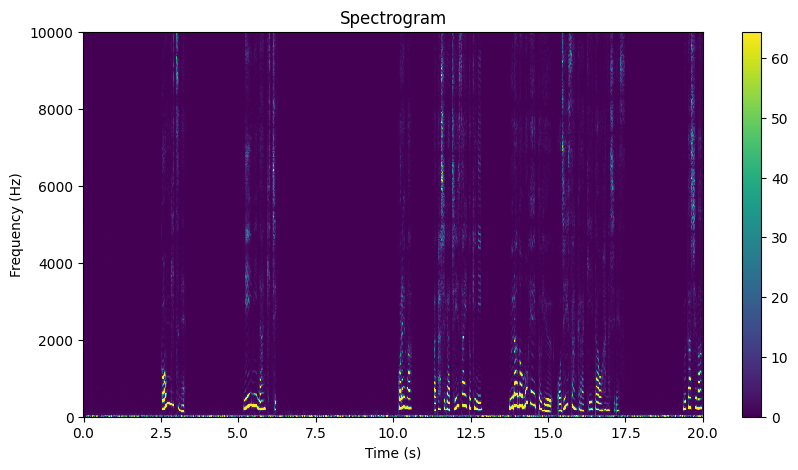

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment # 音声データ操作のためのライブラリpydubをインポート
from IPython.display import Audio, display # 音声再生のためのインターフェースをインポート
from scipy.signal import stft # 短時間フーリエ変換のための関数stftをインポート

# アップロードされたファイルの名前を取得
filename = "tnc__gongitsune_20sec.wav"

# pydubを使って音声ファイルを読み込む
audio = AudioSegment.from_file(filename, format="wav")

# 音声データをnumpy配列に変換
samples = np.array(audio.get_array_of_samples())
rate = audio.frame_rate

# 短時間フーリエ変換の実行
f, t, Zxx = stft(samples, fs=rate, nperseg=2000)
amp = np.std(np.abs(Zxx))

# スペクトログラムをプロット
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, np.abs(Zxx), vmax=amp*10) # 標準偏差の10倍を最大値として表示
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0,10000) # 10kHzまで表示
plt.colorbar()
plt.show()

# 音声を再生
display(Audio(samples, rate=rate, autoplay=True))

In [12]:
from scipy.signal import butter, filtfilt

# バターワース・ローパスフィルタの設定
nyquist_freq = 0.5 * rate
cutoff = 3000  # ローパスフィルタのカットオフ周波数
order = 5  # フィルタの次数

# フィルタ係数の計算
b, a = butter(order, cutoff / nyquist_freq, btype='low')

# フィルタの適用
filtered_samples = filtfilt(b, a, samples)



---


### **課題4: 心拍計測を行う**

1.  30秒以上安静にした上で、以下のいずれかの方法で心拍数（bpm）を計測してください。計測は3分以上の間隔をあけて2回以上行い、結果を平均してください。

  *   橈骨動脈脈拍測定（例：手首に指を当てて15秒間の拍動数を数え、4倍する）
  *   心拍計測機能付きスマートウォッチ（持っていれば）
  *   その他

2. 以下のいずれかを行ってください。（ただし、周囲には気をつけて、無理な運動はしないでください）
  *   （無理なく運動ができるようであれば）負荷量の異なる複数の運動（その場駆け足N秒/2N秒、スクワットM回/2M回等）を行い、それぞれ運動直後の心拍数を計測してください。上の項目で計測した心拍数と比較し、それぞれどの程度変化したか（あるいはしなかったか）を確認してください。
  *   （運動が難しければ）数学の問題を解く、面白い/怖い動画を見る、会話をする、などの認知活動を行い、それぞれ直後の心拍数を計測してください。上の項目で計測した心拍数と比較し、それぞれどの程度変化したか（あるいはしなかったか）を確認してください。


上記の実測経験を踏まえ、以下について解答してください。
1.  **計測に用いた心拍測定の原理、および測定手順や注意点について、初見の高校生が読んで計測が実施できる程度に判りやすく簡潔に説明してください。**
2.  **心拍に対する運動や認知負荷の影響（量や種類と心拍変化量の関係）、あるいは心拍測定の安定性やゆらぎについて、計測体験をもとに概説してください。**

<br>

参考：

看護roo!

<img src="https://img.kango-roo.com/upload/images/scio/kiso-kangogijyutsu/34-53/ch2-f1.png" width=70%>

厚生労働省　運動基準・運動指針の改定に関する検討会　報告書

<img src="https://nishimotolab.org/images/seeds/hr_scale.png" width=70%>